# Project On Random Forest:

# Importing the Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read The Data Using Pandas:

In [2]:
mydata=pd.read_csv('TaxiFare.csv')
mydata

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In the Given Dataset the Dependant Variable is amount and its in continuous Data, Regressor() is Used

# Check For the Type:

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


# Describe the Data

In [4]:
mydata.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


# Check For Null

In [5]:
mydata.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

No Nulls Present in the Given Dataset

# Univariate And Bivariate Analysis

# Correlation:

In [6]:
mydata_corr=mydata.corr()
mydata_corr

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.016583
longitude_of_pickup,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.005604
latitude_of_pickup,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.003237
longitude_of_dropoff,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.004936
latitude_of_dropoff,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.002958
no_of_passenger,0.016583,-0.005604,0.003237,-0.004936,0.002958,1.000000


# correlogram

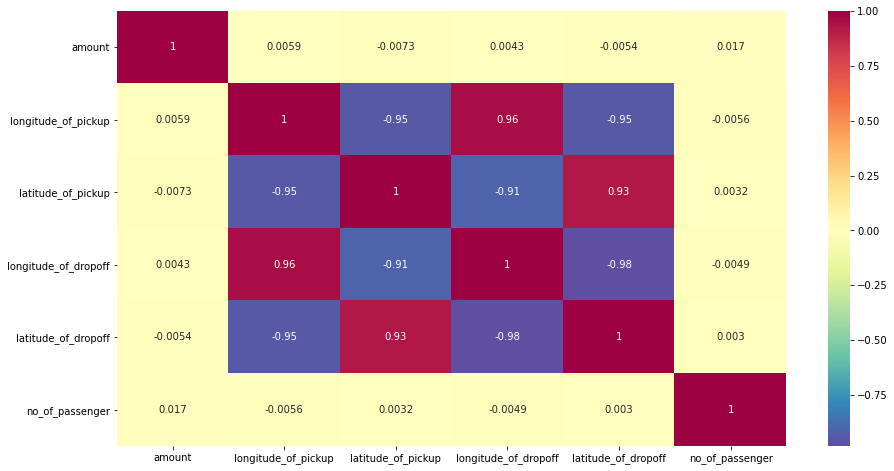

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(mydata_corr,annot=True,cmap='Spectral_r')
plt.show()

# Visualization:

# Graph 1 : Pairplot is used:

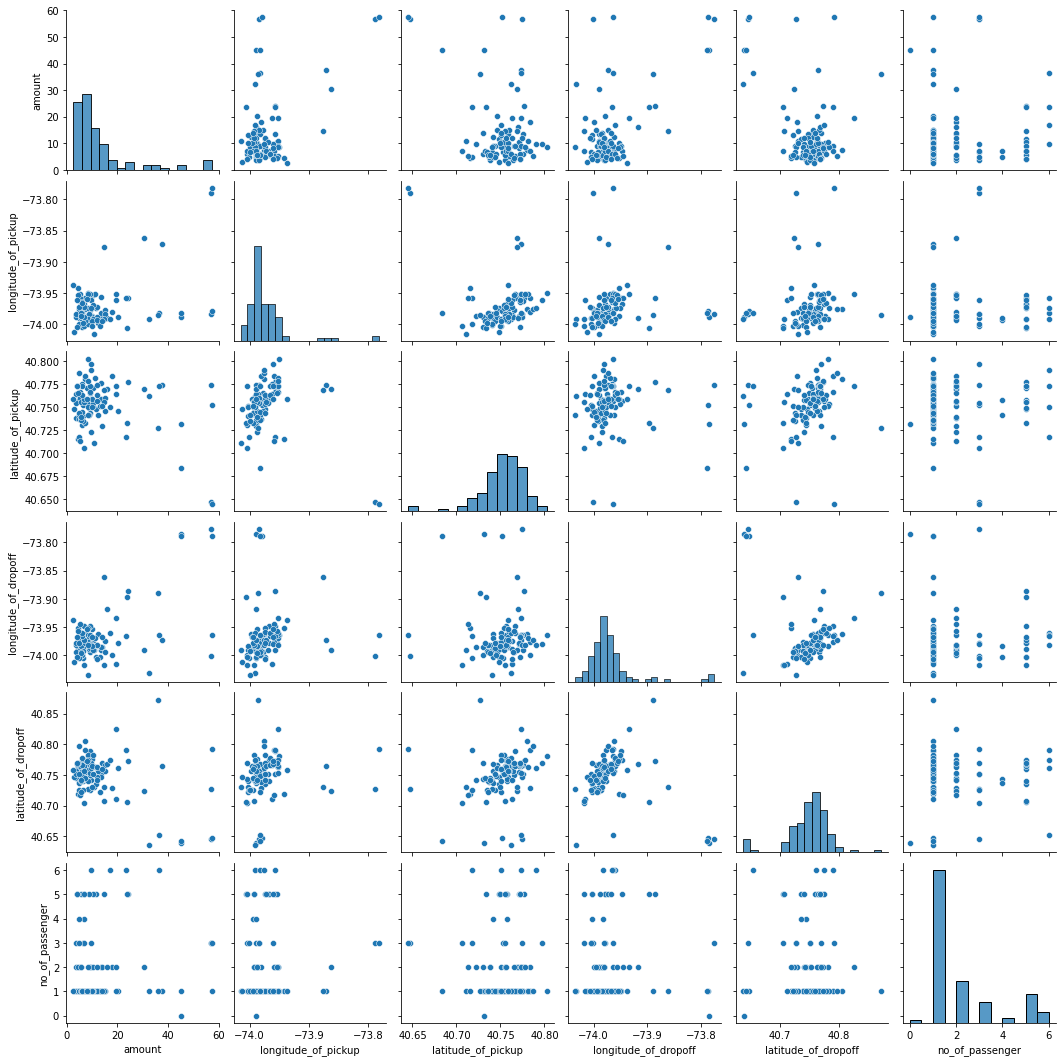

In [8]:
sns.pairplot(mydata.sample(100));

# Graph 2 : Boxplot is used:

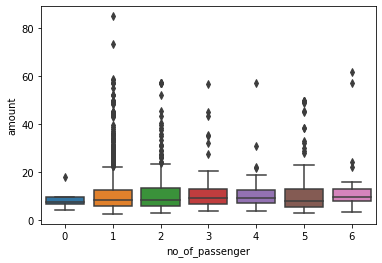

In [9]:
sns.boxplot(x="no_of_passenger",y="amount",data=mydata.sample(2000));

# Graph 3: jointplot is used

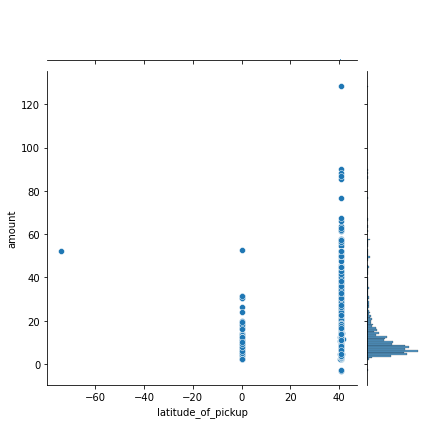

In [20]:
sns.jointplot(x="latitude_of_pickup",y='amount',data=mydata.sample(4000));

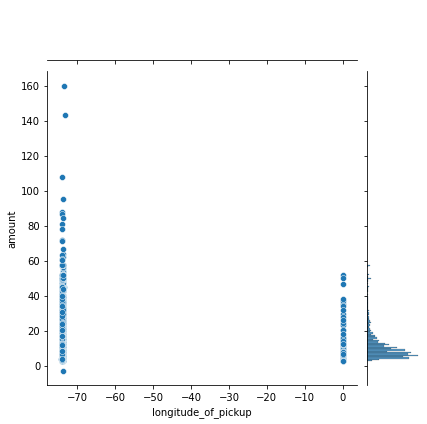

In [21]:
sns.jointplot(x="longitude_of_pickup",y='amount',data=mydata.sample(5000));

# Graph 4 : Catplot is used

C:\Users\mani9\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mani9\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1080x576 with 0 Axes>

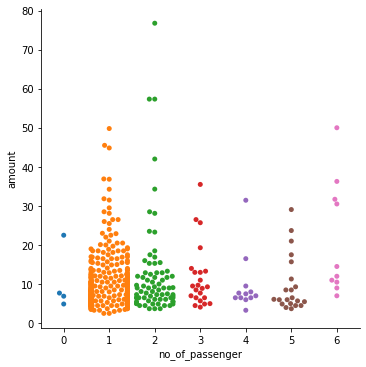

In [22]:
plt.figure(figsize=(15,8))
sns.catplot(x='no_of_passenger',y='amount',kind='swarm',data=mydata.sample(500));
plt.show()

# Graph 5: Barplot is used

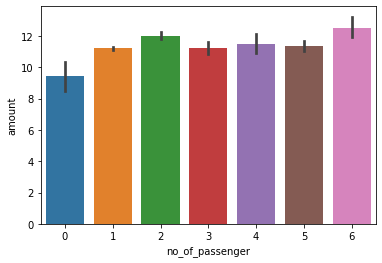

In [13]:
sns.barplot(x='no_of_passenger',y='amount',data=mydata);

# Graph 6 : Scatter Plot 

Text(0.5, 1.0, 'latitude_of_dropoff vs amount')

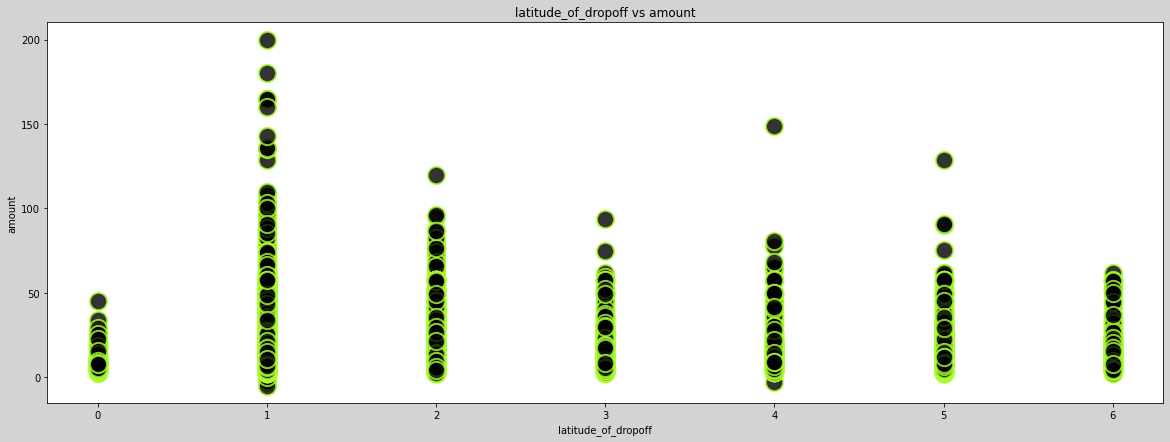

In [14]:
plt.figure(figsize=(20,7),facecolor='lightgrey')
plt.scatter(mydata.no_of_passenger,mydata.amount,color='Black',alpha=0.8,edgecolors='greenyellow',
           linewidths=2,s=300)
plt.xlabel("latitude_of_dropoff")
plt.ylabel("amount")
plt.title ("latitude_of_dropoff vs amount")

# Dropping Date and Time series Datas

In [15]:
mydata=mydata.drop('date_time_of_pickup',axis=1)
mydata=mydata.drop('unique_id',axis=1)

The series of time and Date Datas in the Dataset is dropped

# Dependant Variables

In [16]:
y_dep=mydata.amount
y_dep

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
49995    15.0
49996     7.5
49997     6.9
49998     4.5
49999    10.9
Name: amount, Length: 50000, dtype: float64

Dependant variable stored in y_dep

# Independant Variables

In [17]:
x_ind=mydata.drop('amount',axis=1)
x_ind

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,-73.844311,40.721319,-73.841610,40.712278,1
1,-74.016048,40.711303,-73.979268,40.782004,1
2,-73.982738,40.761270,-73.991242,40.750562,2
3,-73.987130,40.733143,-73.991567,40.758092,1
4,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...
49995,-73.999973,40.748531,-74.016899,40.705993,1
49996,-73.984756,40.768211,-73.987366,40.760597,1
49997,-74.002698,40.739428,-73.998108,40.759483,1
49998,-73.946062,40.777567,-73.953450,40.779687,2


Independant Variable Stored in x_ind

# Split the Data to Train the Model

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ind, y_dep, test_size = 0.2, random_state =2)

# Train the Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Create the Model

In [45]:
model_rf=RandomForestRegressor(random_state=3)

# Fit the Model

In [46]:
model_rf.fit(x_train,y_train)

RandomForestRegressor(random_state=3)

# Machine Predicted

In [47]:
y_pred=model_rf.predict(x_test)
y_pred

array([ 6.315, 15.582,  7.743, ..., 12.793, 14.367,  7.175])

# Accuracy of the model

In [48]:
model_rf.score(x_test,y_test)

0.7700843298183686

The Accuracy of the Model is 0.7700843298183686(77%)

# Mean Square Error

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
MSE=mean_squared_error(y_test,y_pred)
MSE

21.29804199770552

# Root Mean Square

In [51]:
root_mean=np.sqrt(MSE)
root_mean

4.614980173056599

# Creating a Data Frame for Actual and Machine Predicted

In [52]:
f_com=pd.DataFrame({'Actual':y_test,'Machine_Predicted':y_pred})
f_com

,Actual,Machine_Predicted
23656,8.0,6.315
27442,12.0,15.582
40162,7.0,7.743
8459,8.0,9.082
8051,10.1,10.000
...,...,...
44231,15.0,14.021
18034,9.5,9.019
33856,12.5,12.793
15906,12.5,14.367


# Residual (y_test-y_pred)

In [53]:
Residual=y_test-y_pred
Residual

23656    1.685
27442   -3.582
40162   -0.743
8459    -1.082
8051     0.100
         ...  
44231    0.979
18034    0.481
33856   -0.293
15906   -1.867
40899    0.325
Name: amount, Length: 10000, dtype: float64

# Graphical Representation

In [54]:
x_test.shape

(10000, 5)

In [55]:
comp_g=f_com.head(100)

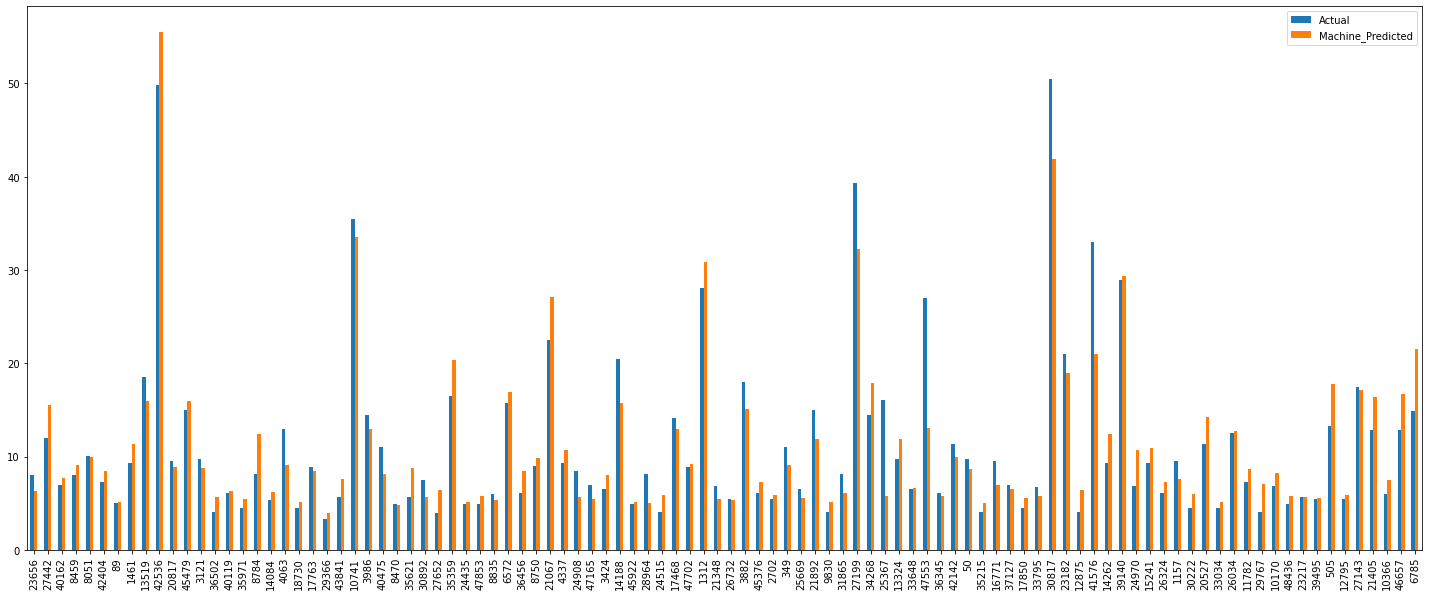

In [59]:
comp_g.plot(kind='bar',figsize=(25,10));

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


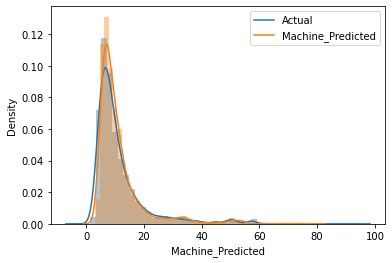

In [101]:
sns.distplot(f_com['Actual'])
sns.distplot(f_com['Machine_Predicted'])
plt.legend(['Actual','Machine_Predicted'])

# Random Forest hyper parameter Tuning

In [102]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
parameters={'n_estimators':(200,300,400,500),'max_features':('auto','sqrt','log2'),
           'min_samples_split':(2,4,6),'random_state':(0,1,2,3,4,5)}
parameters

{'n_estimators': (200, 300, 400, 500),
 'max_features': ('auto', 'sqrt', 'log2'),
 'min_samples_split': (2, 4, 6),
 'random_state': (0, 1, 2, 3, 4, 5)}

# Create The Model

In [104]:
RF=RandomizedSearchCV(RandomForestRegressor(),param_distributions=parameters,cv=5,random_state=3)

# Fit the Model

In [106]:
RF.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6),
                                        'n_estimators': (200, 300, 400, 500),
                                        'random_state': (0, 1, 2, 3, 4, 5)},
                   random_state=3)

# Check For Best Estimator

In [107]:
RF.best_estimator_

RandomForestRegressor(max_features='sqrt', min_samples_split=6,
                      n_estimators=400, random_state=1)

# Assigning Best Estimator Parameters for Model Regressor

In [108]:
model_hp=RandomForestRegressor(max_features='sqrt', min_samples_split=6,
                      n_estimators=400, random_state=1)

# Fit the Best Estimator Model

In [109]:
model_hp=model_hp.fit(x_train,y_train)

# Prediction of Best Estimator Model

In [110]:
y_pred_hp=model_hp.predict(x_test)
y_pred_hp

array([ 6.65025642, 14.52414176,  8.21329321, ..., 13.69496703,
       14.97261969,  6.68595685])

# Create a DataFrame

In [111]:
hp_com=pd.DataFrame({'Actual':y_test,'Machine_Predicted':y_pred_hp})
hp_com

,Actual,Machine_Predicted
23656,8.0,6.650256
27442,12.0,14.524142
40162,7.0,8.213293
8459,8.0,8.938021
8051,10.1,9.974367
...,...,...
44231,15.0,13.808400
18034,9.5,8.926557
33856,12.5,13.694967
15906,12.5,14.972620


# Residual of Hyper Parameter Tuning

In [112]:
Residual_hp=y_test-y_pred_hp
Residual_hp

23656    1.349744
27442   -2.524142
40162   -1.213293
8459    -0.938021
8051     0.125633
           ...   
44231    1.191600
18034    0.573443
33856   -1.194967
15906   -2.472620
40899    0.814043
Name: amount, Length: 10000, dtype: float64

# Accuracy of Best Estimator Model

In [113]:
model_hp.score(x_test,y_test)

0.7803401857097036

The Accuracy of the Best Estimator Model is 0.7803401857097036 (78%)

# Mean Square Error

In [114]:
from sklearn.metrics import mean_squared_error

In [115]:
MSE_hp=mean_squared_error(y_test,y_pred_hp)
MSE_hp

20.347999535077765

# Root Mean Square

In [116]:
root_mean_hp=np.sqrt(MSE_hp)
root_mean_hp

4.510875694926404

# Graphical Representation of Best Estimator Model

In [117]:
x_test.shape

(10000, 5)

In [118]:
comp_hp=hp_com.head(100)

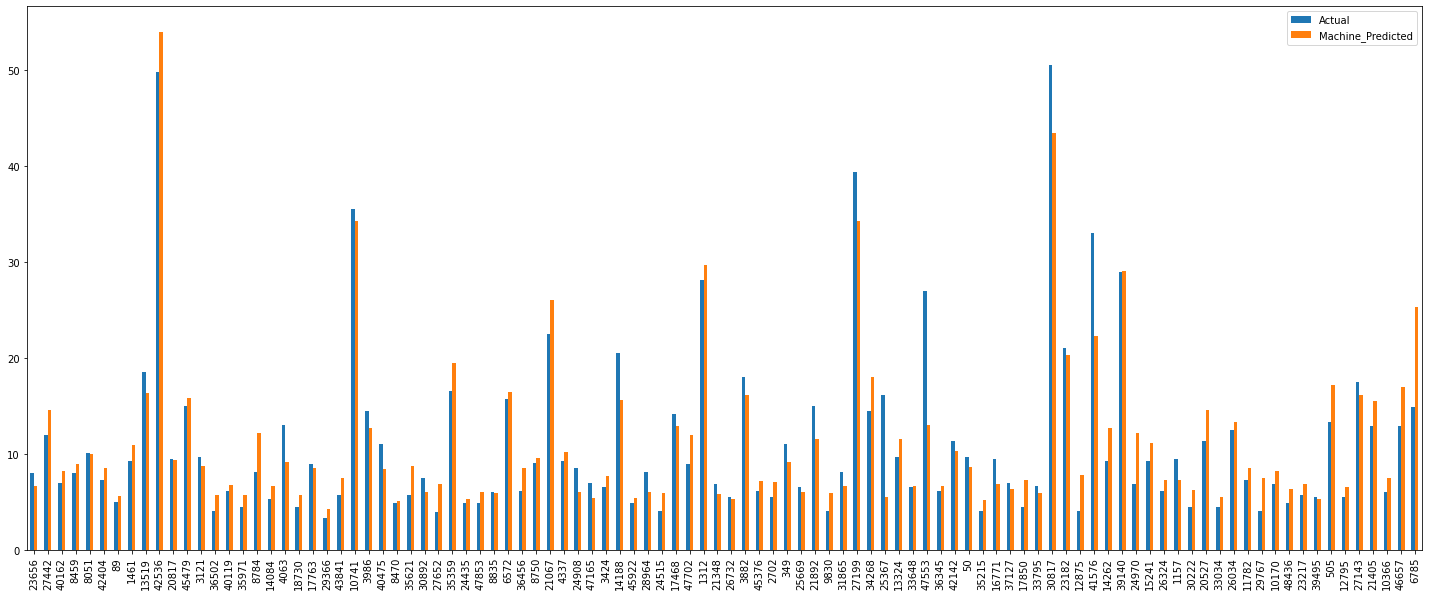

In [119]:
comp_hp.plot(kind='bar',figsize=(25,10));

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


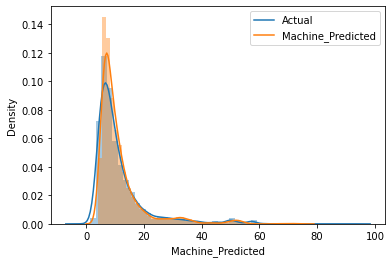

In [120]:
sns.distplot(hp_com['Actual'])
sns.distplot(hp_com['Machine_Predicted'])
plt.legend(['Actual','Machine_Predicted'])

# By comparing the Accuracy of the model before and after HyperParameter Tuning, The HyperParameter Tuning Gives the Best Accuracy of 78%